# **- Pipeline crack detection -**

# **pipe_segmentation_train V2**

This model is able to detect pipes on an image and generate a mask.

This version has ben trainned with good and cracked pipes.



# **0. Libraries**

### Installing libraries

In [ ]:
print("Installing segmentation_models....")
!pip install segmentation_models --quiet
print("  -> segmentation_models installed!")

print("\n" + '\033[1m' + "Libraries correctly installed!" + '\033[0m')

Installing segmentation_models....
  -> segmentation_models installed!

Libraries correctly installed!


### Importing libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os
import cv2
from datetime import datetime
import random

import matplotlib.pyplot as plt
import numpy as np

%env SM_FRAMEWORK = tf.keras
import segmentation_models as sm
from sklearn.model_selection import train_test_split

# from keras.preprocessing.image import ImageDataGenerator

# from patchify import patchify, unpatchify
# import tifffile as tiff

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
env: SM_FRAMEWORK=tf.keras
Segmentation Models: using `tf.keras` framework.


# **1. Auxiliar functions**

In [ ]:
class printing_format:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   bold = '\033[1m'
   underline = '\033[4m'
   end = '\033[0m'

format = printing_format()

class img_storage:
  def __init__ (self, good_img, pipe_roi, crack_img, crack_pipe_roi):
    self.pipe_img = pipe_img
    self.pipe_roi = pipe_roi
    self.crack_img = crack_img
    self.crack_pipe_roi = crack_pipe_roi

# **2. DataSet generation**

### 2.1. Import images

In [ ]:
############### Stablish path ###############
%cd '/content/drive/MyDrive/PBL-SecondSemester/DeepLearning/DataSet'
print()

img_size = 256

############### Good images ###############
path = "pipe_img"

files = os.listdir( path )
files = sorted( files )

pipe_img = []

for file in files:

  img = cv2.imread( path + "/" + file )
  img = cv2.resize(img, (img_size, img_size), interpolation= cv2.INTER_LINEAR)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  
  pipe_img.append( img )

############### Pipe area ###############
path = "pipe_roi"

files = os.listdir( path )
files = sorted(files)

pipe_roi = []

for file in files:

  img = cv2.imread( path + "/" + file )
  img = cv2.resize(img, (img_size, img_size), interpolation= cv2.INTER_LINEAR)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  pipe_roi.append( img )

############### Cracked images ###############

path = "crack_img"

files = os.listdir( path )
files = sorted( files )

crack_img = []

for file in files:

  img = cv2.imread( path + "/" + file )
  img = cv2.resize(img, (img_size, img_size), interpolation= cv2.INTER_LINEAR)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  
  crack_img.append( img )

############### Cracked pipe area ###############
path = "cracked_pipe_roi"

files = os.listdir( path )
files = sorted(files)

crack_pipe_roi = []

for file in files:

  img = cv2.imread( path + "/" + file )
  img = cv2.resize(img, (img_size, img_size), interpolation= cv2.INTER_LINEAR)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  crack_pipe_roi.append( img )

############### Generate arrays ###############
pipe_img = np.array(pipe_img)
pipe_roi= np.array(pipe_roi)
crack_img      = np.array(crack_img)
crack_pipe_roi = np.array(crack_pipe_roi)



/content/drive/.shortcut-targets-by-id/1LFMENSUeZANGJsWPtbb3BcvK4y9YdVWF/PBL-SecondSemester/DeepLearning/DataSet



In [ ]:
############### Storage images ###############
saved = img_storage(pipe_img, pipe_roi, crack_img, crack_pipe_roi)

		-- IMAGES --
  Pipe images:  	(199, 256, 256)
  Pipe ROI:     	(199, 256, 256)

Index: 12


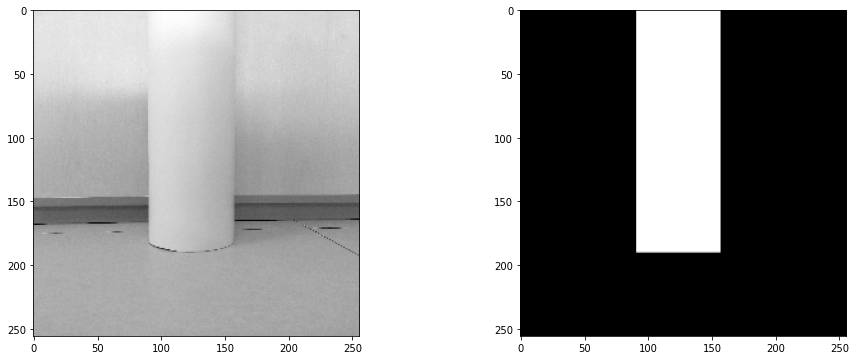

Index: 93


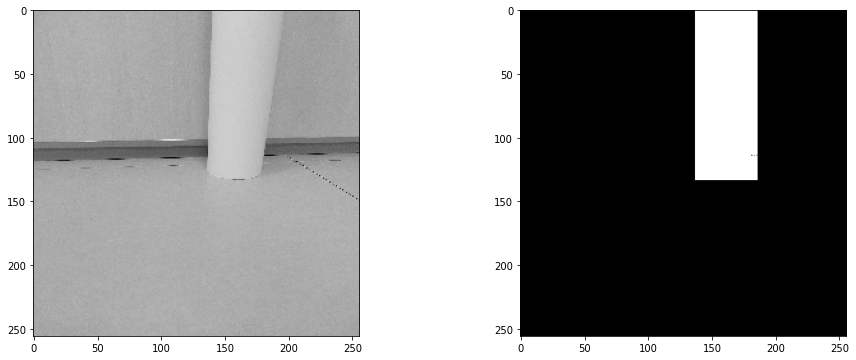

In [ ]:
# Display data shape
print(format.bold + "\t\t-- IMAGES --" + format.end)
print("  Pipe images:  \t" + str( saved.pipe_img.shape ) )
print("  Pipe ROI:     \t" + str( saved.pipe_roi.shape ) )
print()

for i in range(2):

  index = random.randint(0, len(pipe_img) - 1)

  print(format.bold + "Index: " + format.end + str(index))

  plt.figure(figsize=(16, 6))
  plt.subplot(121)
  plt.imshow( pipe_img[index], cmap = "gray")
  plt.subplot(122)
  plt.imshow( pipe_roi[index], cmap = "gray")
  plt.show()

		-- IMAGES --
  Crack images:   	(121, 256, 256)
  Crack pipe ROI: 	(121, 256, 256)
Index: 28


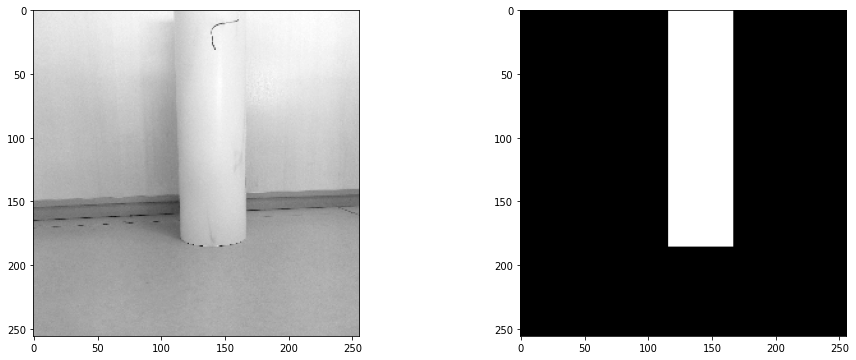

Index: 53


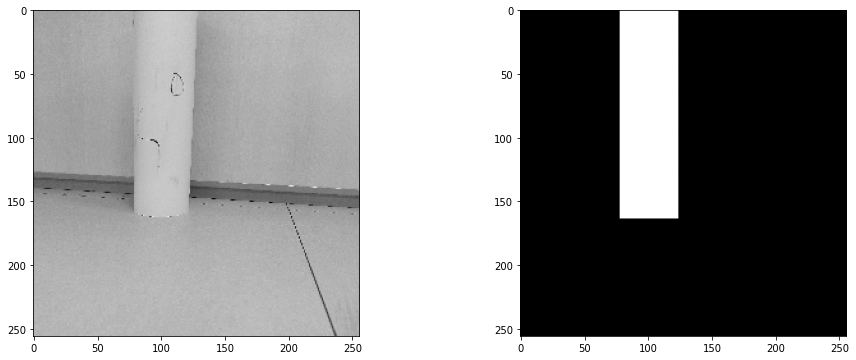

In [ ]:
# Display data shape
print(format.bold + "\t\t-- IMAGES --" + format.end)
print("  Crack images:   \t" + str( saved.crack_img.shape ) )
print("  Crack pipe ROI: \t" + str( saved.crack_pipe_roi.shape ) )

for i in range(2):

  index = random.randint(0, len(crack_img) - 1)

  print(format.bold + "Index: " + format.end + str(index))

  plt.figure(figsize=(16, 6))
  plt.subplot(121)
  plt.imshow( crack_img[index], cmap = "gray")
  plt.subplot(122)
  plt.imshow( crack_pipe_roi[index], cmap = "gray")
  plt.show()

### 2.2. Normalize values

In [ ]:
pipe_img       = saved.pipe_img
pipe_roi       = saved.pipe_roi
crack_img      = saved.crack_img
crack_pipe_roi = saved.crack_pipe_roi

# Data shape and type
print(format.bold + "Splited data:" + format.end)
print("  Pipe images:    \t" + str( pipe_img.shape ) + "\t - " + str( pipe_img.dtype ) )
print("  Pipe ROI:       \t" + str( pipe_roi.shape ) + "\t - " + str( pipe_roi.dtype ) )
print("  Crack images:   \t" + str( crack_img.shape ) + "\t - " + str( crack_img.dtype ) )
print("  Crack pipe ROI: \t" + str( crack_pipe_roi.shape ) + "\t - " + str( crack_pipe_roi.dtype ) )
print()

# Data range
index = random.randint(0, len(crack_img) - 1)
print(format.bold + "Max-Min (" + str(index) + "):" + format.end)
print("  Pipe images:    \t" + str( pipe_img[index, :, :].min() ) + "\t-\t"  + str( pipe_img[index, :, :].max() ) )
print("  Pipe ROI:       \t" + str( pipe_roi[index, :, :].min() ) + "\t-\t"  + str( pipe_roi[index, :, :].max() ) )
print("  Crack images:   \t" + str( crack_img[index, :, :].min() ) + "\t-\t"  + str( crack_img[index, :, :].max() ) )
print("  Crack pipe ROI: \t" + str( crack_pipe_roi[index, :, :].min() ) + "\t-\t"  + str( crack_pipe_roi[index, :, :].max() ) )
print()

# Data normalization
print(format.bold + "Starting data normalization...." + format.end)

for i in range( pipe_img.shape[0] ):

  pipe_img[index] = pipe_img[index] - pipe_img[index].min()
  pipe_img[index] = pipe_img[index] / pipe_img[index].max()

  crack_img[index] = crack_img[index] - crack_img[index].min()
  crack_img[index] = crack_img[index] / crack_img[index].max()

pipe_roi       = pipe_roi > 20
crack_pipe_roi = crack_pipe_roi > 20

# Data type selection
data_type = "float32"
pipe_img       = pipe_img.astype( data_type )
pipe_roi       = pipe_roi.astype( data_type )
crack_img      = crack_img.astype( data_type )
crack_pipe_roi = crack_pipe_roi.astype( data_type )

print("  -> Data normalization finished!\n")

# New data shape and type
print(format.bold + "Splited data:" + format.end)
print("  Pipe images:    \t" + str( pipe_img.shape ) + "\t - " + str( pipe_img.dtype ) )
print("  Pipe ROI:       \t" + str( pipe_roi.shape ) + "\t - " + str( pipe_roi.dtype ) )
print("  Crack images:   \t" + str( crack_img.shape ) + "\t - " + str( crack_img.dtype ) )
print("  Crack pipe ROI: \t" + str( crack_pipe_roi.shape ) + "\t - " + str( crack_pipe_roi.dtype ) )
print()

# New data range
print(format.bold + "Max-Min (" + str(index) + "):" + format.end)
print("  Pipe images:    \t" + str( pipe_img[index, :, :].min() ) + "\t-\t"  + str( pipe_img[index, :, :].max() ) )
print("  Pipe ROI:       \t" + str( pipe_roi[index, :, :].min() ) + "\t-\t"  + str( pipe_roi[index, :, :].max() ) )
print("  Crack images:   \t" + str( crack_img[index, :, :].min() ) + "\t-\t"  + str( crack_img[index, :, :].max() ) )
print("  Crack pipe ROI: \t" + str( crack_pipe_roi[index, :, :].min() ) + "\t-\t"  + str( crack_pipe_roi[index, :, :].max() ) )
print()

Splited data:
  Pipe images:    	(199, 256, 256)	 - uint8
  Pipe ROI:       	(199, 256, 256)	 - uint8
  Crack images:   	(121, 256, 256)	 - uint8
  Crack pipe ROI: 	(121, 256, 256)	 - uint8

Max-Min (108):
  Pipe images:    	0	-	243
  Pipe ROI:       	0	-	255
  Crack images:   	0	-	215
  Crack pipe ROI: 	0	-	255

Starting data normalization....
  -> Data normalization finished!

Splited data:
  Pipe images:    	(199, 256, 256)	 - float32
  Pipe ROI:       	(199, 256, 256)	 - float32
  Crack images:   	(121, 256, 256)	 - float32
  Crack pipe ROI: 	(121, 256, 256)	 - float32

Max-Min (108):
  Pipe images:    	0.0	-	1.0
  Pipe ROI:       	0.0	-	1.0
  Crack images:   	0.0	-	1.0
  Crack pipe ROI: 	0.0	-	1.0



Index: 27


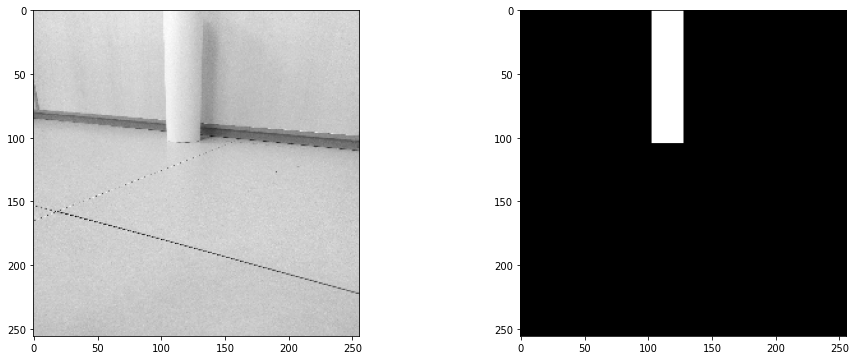

Index: 19


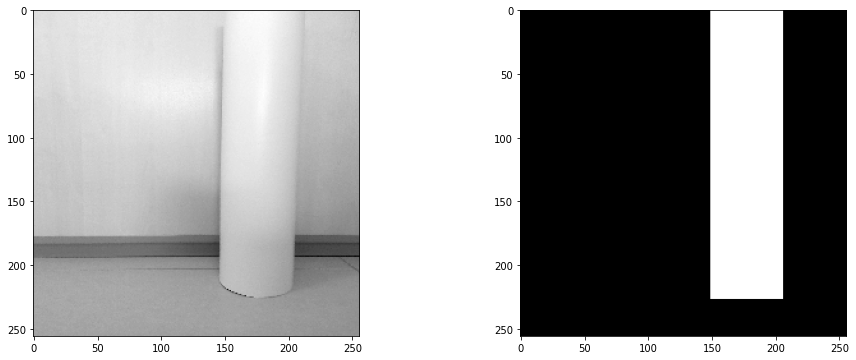

In [ ]:
for i in range(2):

  index = random.randint(0, len(pipe_img) - 1)

  print(format.bold + "Index: " + format.end + str(index))

  plt.figure(figsize=(16, 6))
  plt.subplot(121)
  plt.imshow( pipe_img[index], cmap = "gray")
  plt.subplot(122)
  plt.imshow( pipe_roi[index], cmap = "gray")
  plt.show()

Index: 20


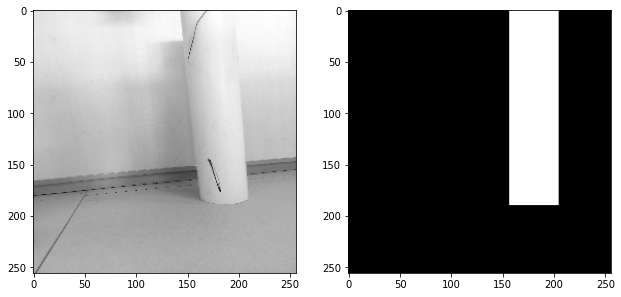

Index: 104


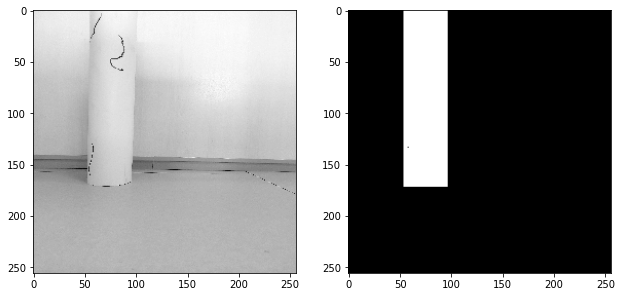

In [ ]:
for i in range(2):

  index = random.randint(0, len(crack_img) - 1)

  print(format.bold + "Index: " + format.end + str(index))

  plt.figure(figsize=(16, 6))
  plt.subplot(131)
  plt.imshow( crack_img[index], cmap = "gray")
  plt.subplot(132)
  plt.imshow( crack_pipe_roi[index], cmap = "gray")
  plt.show()

### 2.3. Clone layers

In [ ]:
x1 = np.zeros( (pipe_img.shape[0], pipe_img.shape[1], pipe_img.shape[2], 3), dtype = data_type )
x2 = np.zeros( (crack_img.shape[0], crack_img.shape[1], crack_img.shape[2], 3), dtype = data_type )

x1[:, :, :, 0] = pipe_img[:, :, :]
x1[:, :, :, 1] = pipe_img[:, :, :]
x1[:, :, :, 2] = pipe_img[:, :, :]

x2[:, :, :, 0] = crack_img[:, :, :]
x2[:, :, :, 1] = crack_img[:, :, :]
x2[:, :, :, 2] = crack_img[:, :, :]

pipe_img  = x1
crack_img = x2

print(format.bold + "Pipe images:  " + format.end + str( pipe_img.shape ))
print(format.bold + "Crack images: " + format.end + str( crack_img.shape ))

Pipe images:  (199, 256, 256, 3)
Crack images: (121, 256, 256, 3)


### 2.4. Split data

In [ ]:
# Data shape
print(format.bold + "Splited data:" + format.end)
print("  Pipe images:    \t" + str( pipe_img.shape ) + "\t - " + str( pipe_img.dtype ) )
print("  Pipe ROI:       \t" + str( pipe_roi.shape ) + "\t\t - " + str( pipe_roi.dtype ) )
print("  Crack images:   \t" + str( crack_img.shape ) + "\t - " + str( crack_img.dtype ) )
print("  Crack pipe ROI: \t" + str( crack_pipe_roi.shape ) + "\t\t - " + str( crack_pipe_roi.dtype ) )
print()

# Concatenate
x_var = np.concatenate( (pipe_img, crack_img) )
y_var = np.concatenate( (pipe_roi, crack_pipe_roi) )

print(format.bold + "Dataset:" + format.end)
print("  x_train: \t" + str( x_var.shape ) + "\t - " + str( x_var.dtype ) )
print("  y_train: \t" + str( y_var.shape ) + "\t\t - " + str( y_var.dtype ) )
print()

# Split data
test_size = 0.1

x_train, x_test, y_train, y_test = train_test_split(x_var, y_var, test_size = test_size, random_state = 0)

print(format.bold + "Splited data:" + format.end)
print("  x_train: \t" + str( x_train.shape ) + "\t - " + str( x_train.dtype ) )
print("  y_train: \t" + str( y_train.shape ) + "\t\t - " + str( y_train.dtype ) )
print("  x_test:  \t" + str( x_test.shape ) + "\t - " + str( x_test.dtype ) )
print("  y_test:  \t" + str( y_test.shape ) + "\t\t - " + str( y_test.dtype ) )

Splited data:
  Pipe images:    	(199, 256, 256, 3)	 - float32
  Pipe ROI:       	(199, 256, 256)		 - float32
  Crack images:   	(121, 256, 256, 3)	 - float32
  Crack pipe ROI: 	(121, 256, 256)		 - float32

Dataset:
  x_train: 	(320, 256, 256, 3)	 - float32
  y_train: 	(320, 256, 256)		 - float32

Splited data:
  x_train: 	(288, 256, 256, 3)	 - float32
  y_train: 	(288, 256, 256)		 - float32
  x_test:  	(32, 256, 256, 3)	 - float32
  y_test:  	(32, 256, 256)		 - float32


# **3. Define UNET model**

### 3.1. Trainning the model

In [ ]:
# Paremeters

backbones = ["resnet34", "resnet50"]
BACKBONE = backbones[1]

encoder = 'imagenet'

epoch = 100
batch_size = 4
steps = False

In [ ]:
if steps != False:
  batch_size = int(x_train.shape[0] / steps)
else:
  step = int(x_train.shape[0] / batch_size)

t0 = datetime.now()
t0 = datetime.strftime(t0, "%Y/%m/%d - %H:%M:%S")

print(format.bold + "===============================================" + format.end)
print(format.bold + "\t\t- MODEL SUMMARY -" + format.end)
print(format.bold + "===============================================" + format.end)
print(format.bold + "Start time:       \t" + format.end + str(t0) )
print(format.bold + "Train size:       \t" + format.end + str(x_train.shape[0]))
print(format.bold + "Image size:       \t" + format.end + str(x_train.shape[1]) + "x" + str(x_train.shape[2]) )
print(format.bold + "===============================================" + format.end)
print(format.bold + "Backbone:         \t" + format.end + str(BACKBONE))
print(format.bold + "Encoder_weights:  \t" + format.end + str(encoder))
print(format.bold + "Epochs:           \t" + format.end + str(epoch))
print(format.bold + "Steps per epoch:  \t" + format.end + str(step))
print(format.bold + "Batch size:       \t" + format.end + str(batch_size))
print(format.bold + "===============================================" + format.end)

		- MODEL SUMMARY -
Start time:       	2022/06/09 - 07:14:38
Train size:       	288
Image size:       	256x256
Backbone:         	resnet50
Encoder_weights:  	imagenet
Epochs:           	100
Steps per epoch:  	72
Batch size:       	4


In [ ]:
preprocess_input1 = sm.get_preprocessing(BACKBONE)

model = sm.Unet(BACKBONE, encoder_weights = encoder)

model.compile('Adam', loss = sm.losses.bce_jaccard_loss, metrics = [sm.metrics.iou_score])

# print( model.summary() )

if steps != False:
  history = model.fit(x = x_train, y = y_train, validation_data = (x_test, y_test), epochs = epoch, steps_per_epoch = steps)
else:
  history = model.fit(x = x_train, y = y_train, validation_data = (x_test, y_test), epochs = epoch, batch_size = batch_size)

Epoch 1/100
72/72 [==============================] - 557s 8s/step - loss: 0.5315 - iou_score: 0.6203 - val_loss: 0.6548 - val_iou_score: 0.5941
Epoch 2/100
72/72 [==============================] - 543s 8s/step - loss: 0.2376 - iou_score: 0.8395 - val_loss: 1.6128 - val_iou_score: 0.4309
Epoch 3/100
72/72 [==============================] - 548s 8s/step - loss: 0.2171 - iou_score: 0.8580 - val_loss: 1.6286 - val_iou_score: 0.3850
Epoch 4/100
72/72 [==============================] - 544s 8s/step - loss: 0.2281 - iou_score: 0.8529 - val_loss: 2.3655 - val_iou_score: 0.2166
Epoch 5/100
72/72 [==============================] - 545s 8s/step - loss: 0.1923 - iou_score: 0.8783 - val_loss: 1.3465 - val_iou_score: 0.5059
Epoch 6/100
72/72 [==============================] - 552s 8s/step - loss: 0.1792 - iou_score: 0.8865 - val_loss: 0.6063 - val_iou_score: 0.6432
Epoch 7/100
72/72 [==============================] - 549s 8s/step - loss: 0.1691 - iou_score: 0.8944 - val_loss: 0.9817 - val_iou_score:

In [ ]:
tf = datetime.now()
tf = datetime.strftime(tf, "%Y/%m/%d - %H:%M:%S")
print(format.bold + "End time:       \t" + format.end + str(tf) )

In [ ]:
# Plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
acc = history.history['iou_score']
val_acc = history.history['val_iou_score']

plt.plot(epochs, acc, 'y', label='Training IOU')
plt.plot(epochs, val_acc, 'r', label='Validation IOU')
plt.title('Training and validation IOU')
plt.xlabel('Epochs')
plt.ylabel('IOU')
plt.legend()
plt.show()

In [ ]:
# Save model results

%cd '/content/drive/MyDrive/PBL-SecondSemester/DeepLearning/model_data'

model_name = datetime.now()
model_name = datetime.strftime(model_name, "%Y-%m-%d_%H-%M-%S")
model_name = str( model_name ) + "_unet_model"

print(format.bold + "UNET file: \t" + format.end + model_name)

model.save( model_name )

### 3.2. Check results

In [ ]:
prediction = model.predict( x_test )
prediction = prediction[:, :, :, 0]

print(format.bold + "Images format:" + format.end)
print("  Image:   \t " + str(x_test.shape) + "\t - " + str( x_test.dtype ) )
print("  ROI:     \t " + str(y_test.shape) + "\t\t - " + str( y_test.dtype ) )
print("  Predict: \t " + str(prediction.shape) + "\t\t - " + str( y_test.dtype ) )
print()

for i in range(5):

  index = random.randint(0, len(x_test) - 1)

  print(format.bold + str(i) + ". Index:  " + format.end + str(index))
  plt.figure(figsize=(12, 6))
  plt.subplot(131)
  plt.imshow( x_test[index], cmap = "gray")
  plt.subplot(132)
  plt.imshow( y_test[index], cmap = "gray")
  plt.subplot(133)
  plt.imshow( prediction[index], cmap = "gray" )
  plt.show()